# **Import libraries**


In [1]:
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\MahishaMudaliar\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_

True

In [ ]:
! pip install keras_preprocessing


### **Load Dataset**


In [2]:
import pandas as pd
import chardet

with open("Stakeholders Dataset\Stakeholders Dataset.csv", 'rb') as f:
    result = chardet.detect(f.read())  # detects encodings like UTF-8, ASCII, ISO-8859-1

df = pd.read_csv("Stakeholders Dataset\Stakeholders Dataset.csv", engine='python', encoding=result['encoding'])
df['category'].value_counts()

category
Employee Health, Safety & Wellness                 12
Training & Development                             11
Water Use & Management                             11
Energy Management                                   8
Waste Management & Effluents                        7
Environmental Impact of Cotton and Other Fibres     6
Policies, Standards, Code of Conduct                5
Long term Viability of Core Business                5
Community Development                               5
Chemical Risks and Management                       4
Communication & Engagement                          4
Research, Development & Innovation                  4
Access to Services                                  2
Labour Relations & Union Practices                  2
Board Structure & Independence                      2
Education                                           1
Developing Vocational Skills                        1
Supply Chain Standards & Selection                  1
Customer Satisfacti

In [3]:
import pandas as pd

# Attempt to read the CSV file, trying common encodings
try:
    df = pd.read_csv("Business Dataset\Dataset.csv")
except UnicodeDecodeError:
    try:
        df = pd.read_csv("Business Dataset\Dataset.csv", encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv("Business Dataset\Dataset.csv", encoding='utf-8')

# Check if the 'category' column exists in the DataFrame
if 'category' in df.columns:
    category_counts = df['category'].value_counts()

    # Create a new DataFrame from the counts
    result_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

    # Save to CSV
    result_df.to_csv('business_category_counts.csv', index=False)  # index=False to avoid row numbers
    print("Category counts saved to 'business_category_counts.csv'")
else:
    print("The 'category' column does not exist in the dataset.")


Category counts saved to 'business_category_counts.csv'


In [4]:
df.to_csv("Stakeholders Dataset\Stakeholders Dataset.csv", index=False)  # converts dataframe to CSV
print(df)

                                category  \
0   Policies, Standards, Code of Conduct   
1     Employee Health, Safety & Wellness   
2   Long term Viability of Core Business   
3                 Product Societal Value   
4   Policies, Standards, Code of Conduct   
..                                   ...   
94    Employee Health, Safety & Wellness   
95    Labour Relations & Union Practices   
96                Training & Development   
97                Training & Development   
98                Training & Development   

                                                 text  
0   HILE ACTIONS ALWAYS SPEAK LOUDER THAN WORDS, W...  
1   NURTURE TALENT ......... DO GOOD BUILD LEADERS...  
2   COMPANY PROFILE With a market cap of USD 1.3 b...  
3   Vision WE WILL ENABLE PEOPLE TO EXPERIENCE A B...  
4   CHARTERS, PRINCIPLES AND COALITIONS Our long-s...  
..                                                ...  
94  CASE STUDY COMBATING FIRE INCIDENTS SANTEJ Cha...  
95  We have structured 

# **Data Cleaning**


In [5]:
df['text']=df['text'].fillna("")  # replaces all NaN with empty string
df.isna().sum() 

category    0
text        0
dtype: int64

# **Preprocessing**


In [6]:
# Detect encoding and load CSV file
with open("Stakeholders Dataset\Stakeholders Dataset.csv", 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv("Stakeholders Dataset\Stakeholders Dataset.csv", engine='python', encoding=result['encoding'])

# Display the category value counts
# print(df['category'].value_counts())

# Convert to lower case, strip whitespace, and remove newline characters
df['lower_case'] = df['text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

# Remove non-alphabetic characters and non-ASCII characters
df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

# Remove URLs
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

# Tokenize text
tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)

# Define stopwords list
with open("stopwords.txt", 'r') as file:
    stop = [line.strip() for line in file.readlines()]

# Remove stopwords
df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

# Filter out short words
df['short_word'] = df['stop_words'].str.findall('\w{2,}')  # Finding out words with length of 2 words by applying regex
df['string'] = df['short_word'].str.join(' ')   

# Lemmatize text (text normalization in NLP) (returns base form of words)
df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(df['Text'])


0     hile action speak louder word articulated word...
1     nurture talent build leader empower people pow...
2     company profile market cap usd billion 85 rich...
3     vision enable people experience quality life p...
4     charter principle coalition standing commitmen...
                            ...                        
94    study combating fire incident santej challenge...
95    structured policy process various management s...
96    laying strong foundation productivity reportin...
97    development programme develop potential tapped...
98    training development committed growth developm...
Name: Text, Length: 99, dtype: object


In [7]:
df

,category,text,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
0,"Policies, Standards, Code of Conduct","HILE ACTIONS ALWAYS SPEAK LOUDER THAN WORDS, W...","hile actions always speak louder than words, w...",hile actions always speak louder than words w...,hile actions always speak louder than words w...,"[hile, actions, always, speak, louder, than, w...","['hile', 'actions', 'speak', 'louder', 'words'...","[hile, actions, speak, louder, words, articula...",hile actions speak louder words articulated wo...,hile action speak louder word articulated word...
1,"Employee Health, Safety & Wellness",NURTURE TALENT ......... DO GOOD BUILD LEADERS...,nurture talent ......... do good build leaders...,nurture talent do good build leaders...,nurture talent do good build leaders...,"[nurture, talent, do, good, build, leaders, do...","['nurture', 'talent', 'build', 'leaders', 'emp...","[nurture, talent, build, leaders, empower, peo...",nurture talent build leaders empower people po...,nurture talent build leader empower people pow...
2,Long term Viability of Core Business,COMPANY PROFILE With a market cap of USD 1.3 b...,company profile with a market cap of usd 1.3 b...,company profile with a market cap of usd b...,company profile with a market cap of usd b...,"[company, profile, with, a, market, cap, of, u...","['company', 'profile', 'market', 'cap', 'usd',...","[company, profile, market, cap, usd, billion, ...",company profile market cap usd billion 85 rich...,company profile market cap usd billion 85 rich...
3,Product Societal Value,Vision WE WILL ENABLE PEOPLE TO EXPERIENCE A B...,vision we will enable people to experience a b...,vision we will enable people to experience a b...,vision we will enable people to experience a b...,"[vision, we, will, enable, people, to, experie...","['vision', 'enable', 'people', 'experience', '...","[vision, enable, people, experience, quality, ...",vision enable people experience quality life p...,vision enable people experience quality life p...
4,"Policies, Standards, Code of Conduct","CHARTERS, PRINCIPLES AND COALITIONS Our long-s...","charters, principles and coalitions our long-s...",charters principles and coalitions our long s...,charters principles and coalitions our long s...,"[charters, principles, and, coalitions, our, l...","['charters', 'principles', 'coalitions', 'stan...","[charters, principles, coalitions, standing, c...",charters principles coalitions standing commit...,charter principle coalition standing commitmen...
...,...,...,...,...,...,...,...,...,...,...
94,"Employee Health, Safety & Wellness",CASE STUDY COMBATING FIRE INCIDENTS SANTEJ Cha...,case study combating fire incidents santej cha...,case study combating fire incidents santej cha...,case study combating fire incidents santej cha...,"[case, study, combating, fire, incidents, sant...","['study', 'combating', 'fire', 'incidents', 's...","[study, combating, fire, incidents, santej, ch...",study combating fire incidents santej challeng...,study combating fire incident santej challenge...
95,Labour Relations & Union Practices,We have structured policies and processes unde...,we have structured policies and processes unde...,we have structured policies and processes unde...,we have structured policies and processes unde...,"[we, have, structured, policies, and, processe...","['structured', 'policies', 'processes', 'vario...","[structured, policies, processes, various, man...",structured policies processes various manageme...,structured policy process various management s...
96,Training & Development,LAYING A STRONG FOUNDATION FOR PRODUCTIVITY In...,laying a strong foundation for productivity in...,laying a strong foundation for productivity in...,laying a strong foundation for productivity in...,"[laying, a, strong, foundation, for, productiv...","['laying', 'strong', 'foundation', 'productivi...","[laying, strong, foundation, productivity, rep...",laying strong foundation productivity reportin

## Visualization


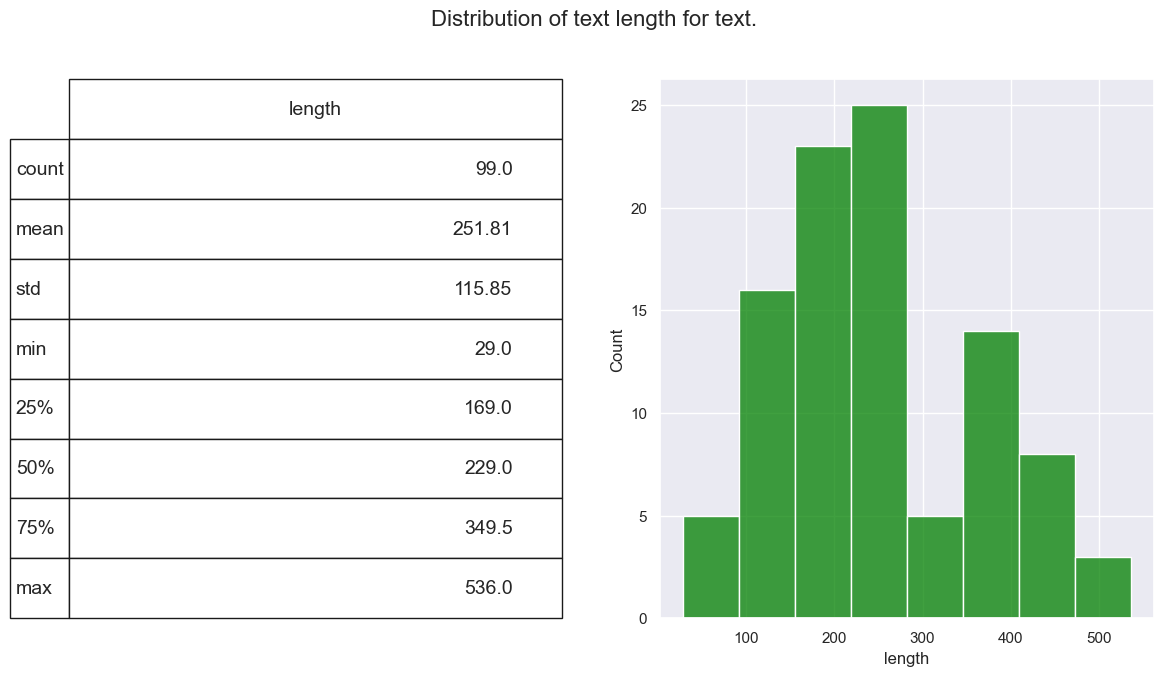

In [251]:
import seaborn as sns
fig = plt.figure(figsize=(14,7)) # Creates a figure with a size of 14x7 inches
df['length'] = df.text.str.split().apply(len) # Creates a new column
ax1 = fig.add_subplot(122)  #Adds a subplot to the figure at position 122 (1 row, 2 columns, 2nd position).
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2) # rounds to 2 decimal place

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

<Axes: xlabel='category', ylabel='count'>

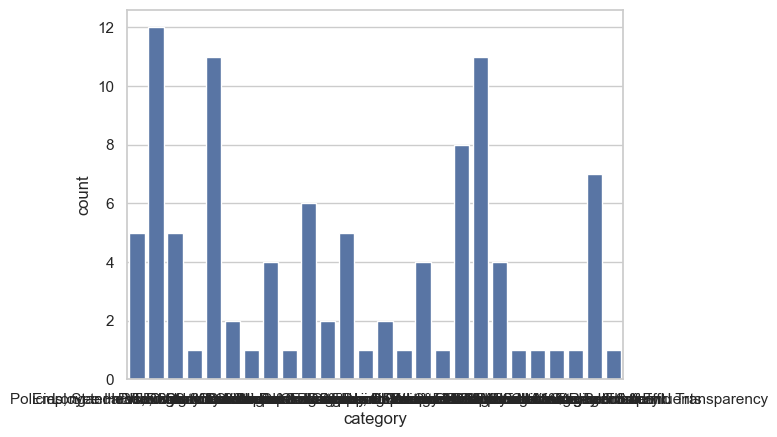

In [252]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["category"])

In [253]:
from collections import Counter
import plotly.express as px

top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')


In [254]:
sport_text = df[df['category']=='Policies, Standards, Code of Conduct']
business_text = df[df['category']=='Employee Health, Safety & Wellness'] 
politics_text = df[df['category']=='Long term Viability of Core Business']
tech_text = df[df['category']=='Training & Development'] 
entertainment_text = df[df['category']=='Board Structure & Independence'] 

In [ ]:
%pip install pip>=24.1.2
%pip install nbfomat>=4.2.0

In [ ]:
! conda install nbformat --verbose

In [255]:
top = Counter([item for sublist in entertainment_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in entertainment_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
normal_words =' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Policies, Standards, Code of Conduct']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Employee Health, Safety & Wellness']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Long term Viability of Core Business']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Training & Development']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Board Structure & Independence']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:

normal_words =' '.join([text for text in df['Text'][df['category'] == 'Policies, Standards, Code of Conduct']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["category"], test_size = 0.25, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(74, 10515) (25, 10515) (74,) (25,)


In [9]:
joblib.dump(count_vect, 'count_vect.pkl')
model = joblib.load('count_vect.pkl')

# **Machine Learning Models**


# **Support Vector Machine**


In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

# Initialize the model
svc = LinearSVC()

# Set up k-fold cross-validation
k = 5  # You can choose any number for k
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and get scores
cv_scores = cross_val_score(svc, x_train_tfidf, y_train, cv=kf, scoring='accuracy')

# Perform cross-validation and get predictions
y_pred2 = cross_val_predict(svc, x_train_tfidf, y_train, cv=kf)

# Print the cross-validation accuracy for each fold
print(f"Cross-validation accuracy scores for each fold: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

# Evaluate the model on the test set
svc.fit(x_train_tfidf, y_train)
y_test_pred = svc.predict(x_test_tfidf)
print("Accuracy on test set: "+str(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred, zero_division=0))


c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation accuracy scores for each fold: [0.53333333 0.66666667 0.46666667 0.53333333 0.42857143]
Mean cross-validation accuracy: 0.5257142857142856
Accuracy on test set: 0.64
                                                 precision    recall  f1-score   support

                 Board Structure & Independence       0.00      0.00      0.00         0
                  Chemical Risks and Management       1.00      1.00      1.00         1
                     Communication & Engagement       1.00      1.00      1.00         2
                          Community Development       0.00      0.00      0.00         0
                   Developing Vocational Skills       0.00      0.00      0.00         0
             Employee Health, Safety & Wellness       0.67      1.00      0.80         2
                              Energy Management       0.75      1.00      0.86         3
Environmental Impact of Cotton and Other Fibres       0.33      1.00      0.50         1
             La

In [11]:
mc = count_vect.transform(["FY2023 ESG Highlights Walmart Opportunity Retail can be a powerful engine for inclusive economic opportunity. We aim to advance equity and opportunity throughout Walmart, our product supply chain, and local communities to fulfill our customer mission, strengthen our business, and help people build a better life for themselves and their families. - RELATED ESG ISSUE BRIEFS: E Human Capital: Good Jobs & Advancement for Associates E Equity & Inclusion at Walmart & Beyond Supplier Opportunity"])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['Employee Health, Safety & Wellness']


# **Sentiment Score**


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC 
# from sklearn.metrics import classification_report, accuracy_score
# from textblob import TextBlob


In [ ]:
# # Example of how to get sentiment scores using TextBlob
# def get_sentiment(text):
#     analysis = TextBlob(text)
#     return analysis.sentiment.polarity  # Returns a score from -1 (negative) to 1 (positive)

# # Apply the function to your text data to get sentiment scores
# df['sentiment_score'] = df['text'].astype(str).apply(get_sentiment)

# # Print the data with sentiment score
# df[['text', 'sentiment_score']]
# # Save text and sentiment scores to a new CSV file
# df[['text', 'sentiment_score']].to_csv('sentiment_scores_stakeholdersdataset.csv', index=False, encoding='utf-8')
# df[['text', 'sentiment_score']]

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, accuracy_score

# Assuming `df` is your DataFrame containing 'text' and 'category' columns

# Split into Training and Testing Sets
X = df['text']
y = df['category'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model Training (SVM)
svm_model = SVC(kernel='linear', probability=True)  # Enable probability estimation
svm_model.fit(X_train_tfidf, y_train)

# Model Evaluation
y_pred = svm_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Get Sentiment Scores (Scaled -1 to 1)
def get_sentiment_svm(text):
    text_tfidf = vectorizer.transform([text])
    probability = svm_model.predict_proba(text_tfidf)[0]  # Get probability for each class
    sentiment_score = probability[1] - probability[0]  # Calculate score (-1 to 1)
    return sentiment_score

# Apply sentiment score calculation to the entire DataFrame
df['sentiment_score_svm'] = df['text'].astype(str).apply(get_sentiment_svm)

# Print the data with sentiment score
print(df[['text', 'sentiment_score_svm']])

# Save text and sentiment scores to a new CSV file
df[['text', 'sentiment_score_svm']].to_csv('sentiment_scores_stakeholdersdataset_svm.csv', index=False, encoding='utf-8')


                                                 precision    recall  f1-score   support

                     Communication & Engagement       0.00      0.00      0.00         1
                          Community Development       0.00      0.00      0.00         0
             Employee Health, Safety & Wellness       0.25      1.00      0.40         2
                              Energy Management       1.00      1.00      1.00         3
Environmental Impact of Cotton and Other Fibres       0.50      1.00      0.67         1
             Labour Relations & Union Practices       0.00      0.00      0.00         1
           Policies, Standards, Code of Conduct       0.00      0.00      0.00         3
             Research, Development & Innovation       1.00      0.50      0.67         2
                         Training & Development       1.00      0.50      0.67         4
                   Waste Management & Effluents       1.00      1.00      1.00         1
                    

c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MahishaMudaliar\anaconda3\envs\SentimentAnalysis\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

# **Impact Score**


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Calculate TF-IDF weights
vectorizer = TfidfVectorizer()   #convert text data into numerical vectors using Term Frequency-Inverse Document Frequency (TF-IDF) 
tfidf_matrix = vectorizer.fit_transform(df['category'])
df['tfidf_avg'] = tfidf_matrix.mean(axis=1)  # Calculates the average TF-IDF score for each document by taking the mean across all terms. This average is stored in the new column df['tfidf_avg'].
# df['tfidf_avg']
# Calculate positional weight
df['position_weight'] = 1 / (df.index + 1)

# Calculate weighted impact score (without scaling)
df['weighted_impact'] = df['sentiment_score_svm'] * df['tfidf_avg'] * df['position_weight']

# Scale the weighted_impact scores to 0-5 range
scaler = MinMaxScaler(feature_range=(1, 5))
df['scaled_impact'] = scaler.fit_transform(df[['weighted_impact']])

# Save the results to a new CSV file
df[['text', 'category', 'scaled_impact']].to_csv('Stakeholders Dataset\stakeholdersdataset_impactscore.csv', index=False, encoding='utf-8')
df[['text', 'category', 'scaled_impact']]


0     0.032200
1     0.028984
2     0.035300
3     0.025041
4     0.032200
        ...   
94    0.028984
95    0.028986
96    0.020397
97    0.020397
98    0.020397
Name: tfidf_avg, Length: 99, dtype: float64

# **Hypertuning using GridSearchCV**

# (MSE and MAE scorings)


In [266]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from textblob import TextBlob

# ... (Your get_sentiment function and sentiment score calculation remain the same)

# Split Data
X = df['text']
y = df['sentiment_score_svm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# SVR with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 1]  # Add epsilon to the grid
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best Model and Evaluation (Regression Metrics)
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test_tfidf)
print(y_pred)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# # Optionally, examine the best hyperparameters found by GridSearchCV
# print("Best Hyperparameters:", grid_search.best_params_)


[0.01678416 0.01678335 0.01678411 0.01680453 0.01678552 0.01678707
 0.01678454 0.01678464 0.01678298 0.01679979 0.01678503 0.01678849
 0.01678311 0.01678499 0.01678922 0.01679011 0.01680245 0.01679685
 0.01678233 0.01678487]
Mean Squared Error: 2.39438316590367e-05
Mean Absolute Error: 0.004373066814977612


# **Plotting Matrix**


In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
stakeholder_data  = pd.read_csv("Stakeholders Dataset\stakeholdersdataset_impactscore.csv")
business_data  = pd.read_csv("Business Dataset\\business_impactscore.csv")

# Display first few rows of each dataset to understand the structure
print(stakeholder_data.head())
print(business_data .head())


                                                text  \
0  HILE ACTIONS ALWAYS SPEAK LOUDER THAN WORDS, W...   
1  NURTURE TALENT ......... DO GOOD BUILD LEADERS...   
2  COMPANY PROFILE With a market cap of USD 1.3 b...   
3  Vision WE WILL ENABLE PEOPLE TO EXPERIENCE A B...   
4  CHARTERS, PRINCIPLES AND COALITIONS Our long-s...   

                               category  scaled_impact  
0  Policies, Standards, Code of Conduct       5.000000  
1    Employee Health, Safety & Wellness       2.595121  
2  Long term Viability of Core Business       2.394894  
3                Product Societal Value       1.661057  
4  Policies, Standards, Code of Conduct       1.733194  
                         category  scaled_impact
0  Board Structure & Independence            1.0
1        Customer Health & Safety            3.0
2           Disclosure & Labeling            2.5
3          Training & Development            2.0
4          Impact from Facilities            2.5


In [270]:
stakeholder_data  = pd.read_csv("Stakeholders Dataset\stakeholdersdataset_impactscore.csv")
business_data  = pd.read_csv("Business Dataset\\business_impactscore.csv")
# Aggregate impact_score by category for stakeholder data
stakeholder_agg = stakeholder_data.groupby('category')['scaled_impact'].sum().reset_index()
stakeholder_agg.rename(columns={'scaled_impact': 'stakeholder_impact_score'}, inplace=True)

# Aggregate impact_score by category for business data
business_agg = business_data.groupby('category')['scaled_impact'].sum().reset_index()
business_agg.rename(columns={'scaled_impact': 'business_impact_score'}, inplace=True)

# Display the aggregated data
print(stakeholder_agg.head())
print(business_agg.head())


                         category  stakeholder_impact_score
0              Access to Services                  2.023893
1  Board Structure & Independence                  2.094227
2   Chemical Risks and Management                  4.137999
3      Communication & Engagement                  4.636594
4           Community Development                  5.131070
                                   category  business_impact_score
0                        Access to Services                    1.5
1              Accounting for Externalities                    2.0
2                     Biodiversity\nImpacts                    2.5
3            Board Structure & Independence                    1.0
4  Business Ethics &\nCompetitive Behaviour                    2.5


In [271]:
# Merge the aggregated data on 'category'
merged_agg = pd.merge(stakeholder_agg, business_agg, on='category')

# Display the merged aggregated data
print(merged_agg.head())


                         category  stakeholder_impact_score  \
0              Access to Services                  2.023893   
1  Board Structure & Independence                  2.094227   
2      Communication & Engagement                  4.636594   
3           Customer Satisfaction                  1.148664   
4               Energy Management                  8.214755   

   business_impact_score  
0                    1.5  
1                    1.0  
2                    2.5  
3                    4.5  
4                    3.0  


In [ ]:
import pandas as pd

# Load datasets
stakeholder_data = pd.read_csv("Stakeholders Dataset/impact_score_stakeholder.csv")
business_data = pd.read_csv("Business Dataset/business_impactscore.csv")

# Display first few rows of each dataset to understand the structure
print("First few rows of stakeholder data:")
print(stakeholder_data.head())

print("First few rows of business data:")
print(business_data.head())

# Aggregate impact_score by category for stakeholder data
stakeholder_agg = stakeholder_data.groupby('category')['scaled_impact'].sum().reset_index()
stakeholder_agg.rename(columns={'scaled_impact': 'stakeholder_impact_score'}, inplace=True)

# Aggregate impact_score by category for business data
business_agg = business_data.groupby('category')['scaled_impact'].sum().reset_index()
business_agg.rename(columns={'scaled_impact': 'business_impact_score'}, inplace=True)

# Display the aggregated data
print("Aggregated stakeholder data:")
print(stakeholder_agg.head())

print("Aggregated business data:")
print(business_agg.head())

# Merge the aggregated data on 'category' with an outer join to include all categories
merged_agg = pd.merge(stakeholder_agg, business_agg, on='category', how='outer')

# Replace any NaN values with 0
merged_agg.fillna(0, inplace=True)

# Calculate total impact score by summing stakeholder_impact_score and business_impact_score
merged_agg['total_impact_score'] = merged_agg['stakeholder_impact_score'] + merged_agg['business_impact_score']

# Normalize total_impact_score to a range between 0 and 5
min_score = merged_agg['total_impact_score'].min()
max_score = merged_agg['total_impact_score'].max()
merged_agg['normalized_total_impact_score'] = (merged_agg['total_impact_score'] - min_score) / (max_score - min_score) * 5

# Normalize stakeholder_impact_score and business_impact_score to a range between 0 and 5
min_stakeholder_score = merged_agg['stakeholder_impact_score'].min()
max_stakeholder_score = merged_agg['stakeholder_impact_score'].max()
merged_agg['normalized_stakeholder_impact_score'] = (merged_agg['stakeholder_impact_score'] - min_stakeholder_score) / (max_stakeholder_score - min_stakeholder_score) * 5

min_business_score = merged_agg['business_impact_score'].min()
max_business_score = merged_agg['business_impact_score'].max()
merged_agg['normalized_business_impact_score'] = (merged_agg['business_impact_score'] - min_business_score) / (max_business_score - min_business_score) * 5

# Display the merged aggregated data with normalized scores
print("Merged aggregated data with normalized scores:")
print(merged_agg.head())

# Save the merged aggregated data to a CSV file
merged_agg.to_csv('aggregated_impact_scores_normalized.csv', index=False)

print("File saved as 'aggregated_impact_scores_normalized.csv'")


In [ ]:
import pandas as pd

# Replace with your actual file paths
stakeholder_data_path = "Stakeholders Dataset\impact_score_stakeholder.csv" 
business_data_path = "Dataset\impact_score.csv"

# Load the data
stakeholder_data = pd.read_csv(stakeholder_data_path)
business_data = pd.read_csv(business_data_path)

# Calculate average scores per category
stakeholder_agg = stakeholder_data.groupby('category')['scaled_impact'].agg(['sum', 'count']).reset_index()
stakeholder_agg['avg_stakeholder_impact_score'] = stakeholder_agg['sum'] / stakeholder_agg['count']
stakeholder_agg.drop(['sum', 'count'], axis=1, inplace=True)  # Drop unnecessary columns

business_agg = business_data.groupby('category')['scaled_impact'].agg(['sum', 'count']).reset_index()
business_agg['avg_business_impact_score'] = business_agg['sum'] / business_agg['count']
business_agg.drop(['sum', 'count'], axis=1, inplace=True)  # Drop unnecessary columns

# Merge and fill missing values
merged_agg = pd.merge(stakeholder_agg, business_agg, on='category', how='outer')
merged_agg.fillna(0, inplace=True)

# Normalize average impact scores (0 to 5)
# for col in ['avg_stakeholder_impact_score', 'avg_business_impact_score']:
#     min_val = merged_agg[col].min()
#     max_val = merged_agg[col].max()
#     merged_agg[f'normalized_{col}'] = (merged_agg[col] - min_val) / (max_val - min_val) * 5

# Save to CSV
merged_agg.to_csv('aggregated_avg_impact_scores_normalized.csv', index=False)

# Display Results (optional)
print(merged_agg.head().to_markdown(index=False, numalign="left", stralign="left"))


In [ ]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

# Decorations
plt.gca().set(xlim=(0, 5), ylim=(0, 5),
              xlabel='Impact on Stakeholders', ylabel='Impact on Business')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Sustainablity Matrix", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

# **Text extraction** (Paragraph format)


In [ ]:
import os  
import pandas as pd  
from azure.ai.formrecognizer import DocumentAnalysisClient  
from azure.core.credentials import AzureKeyCredential  
from tabulate import tabulate  

# Azure credentials setup  
fr_endpoint = "https://smrecog.cognitiveservices.azure.com/"  
fr_key = "36ecfa2cb82d47a8b5d4c572ca8ef063"  

# Function to check if a point is inside a polygon  
def is_point_in_polygon(point, polygon):  
    x, y = point  
    n = len(polygon)  
    inside = False  
    p1x, p1y = polygon[0]  
    for i in range(n + 1):  
        p2x, p2y = polygon[i % n]  
        if y > min(p1y, p2y):  
            if y <= max(p1y, p2y):  
                if x <= max(p1x, p2x):  
                    if p1y != p2y:  
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x  
                    if p1x == p2x or x <= xinters:  
                        inside = not inside  
        p1x, p1y = p2x, p2y  
    return inside  

# Function to check if a bounding box is inside any table spans  
def is_in_table(page_number, bounding_box):  
    for table_span in table_spans:  
        if table_span[0] == page_number and is_point_in_polygon(bounding_box[0], table_span[1]):  
            return True  
    return False  

# Function to extract table data from Form Recognizer result  
def extract_table_data(result):  
    tables_data = []  
    for table in result.tables:  
        table_data = {}  
        for cell in table.cells:  
            row_index = cell.row_index  
            col_index = cell.column_index  
            if row_index not in table_data:  
                table_data[row_index] = {}  
            table_data[row_index][col_index] = cell.content  
        tables_data.append(table_data)  
    return tables_data  

# Function to extract text data from Form Recognizer result  
def extract_text_data(result):  
    pages_text = {}  
    for page in result.pages:  
        page_text = ""  
        for line in page.lines:  
            if not is_in_table(page.page_number, line.polygon):  
                text = line.content.decode("utf-8") if isinstance(line.content, bytes) else line.content  
                page_text += text + " "  # Concatenate lines with a space  
        pages_text[page.page_number] = page_text.strip()  # Strip trailing space  
 
    # Combine text data with each page in a separate paragraph  
    combined_text_data = "\n\n\n\n".join(pages_text.get(page_number, "") for page_number in sorted(pages_text))  
    return combined_text_data  

# Function to process PDF and store extracted data in a single text file  
def process_pdf_and_store_data(pdf_path, local_directory):  
    try:  
        document_analysis_client = DocumentAnalysisClient(endpoint=fr_endpoint, credential=AzureKeyCredential(fr_key))  
        print(f"Processing PDF: {pdf_path}")  
         
        with open(pdf_path, "rb") as pdf_file:  
            poller = document_analysis_client.begin_analyze_document("prebuilt-layout", document=pdf_file)  
            result = poller.result()  
 
        # Extract table spans  
        global table_spans  
        table_spans = []  
        for table in result.tables:  
            for cell in table.cells:  
                if cell.bounding_regions:  
                    page_number = cell.bounding_regions[0].page_number  
                    bounding_box = cell.bounding_regions[0].polygon  
                    table_spans.append((page_number, bounding_box))  
 
        tables_data = extract_table_data(result)  
        text_data = extract_text_data(result)  
 
        # Generate filename for the combined text file  
        base_filename = os.path.basename(pdf_path).replace('.pdf', '')  
        combined_filename = f"{base_filename}_combined.txt"  
        combined_path = os.path.join(local_directory, combined_filename)  
 
        # Write combined data to file  
        with open(combined_path, 'w', encoding='utf-8') as file:  
            # Write text data  
            file.write("Extracted Text:\n")  
            file.write(text_data)  
            file.write("\n\n")  
 
            # Write table data  
            for idx, table_data in enumerate(tables_data):  
                file.write(f"Table {idx + 1}:\n")  
                max_row = max(table_data.keys())  
                max_col = max(max(row.keys() for row in table_data.values()))  
 
                # Initialize the data array  
                data = [["" for _ in range(max_col + 1)] for _ in range(max_row + 1)]  
 
                # Populate the data array with table content  
                for row_idx, row_data in table_data.items():  
                    for col_idx, cell_content in row_data.items():  
                        data[row_idx][col_idx] = cell_content  
 
                # Convert the data array into a pandas DataFrame  
                df = pd.DataFrame(data)  
 
                # Convert DataFrame to markdown table format and write to file  
                table_markdown = tabulate(df.values, tablefmt="pipe")  
                file.write(table_markdown)  
                file.write("\n\n")  
 
        return combined_filename  
 
    except Exception as e:  
        print(f"Error processing {pdf_path}: {e}")  
        return None  

# Define input and output directories  
input_directory = r"C:\Users\MahishaMudaliar\Desktop\sentiment-analysis\Tobe Extracted"  
output_directory = r"C:\Users\MahishaMudaliar\Desktop\sentiment-analysis\Extracted text"  

# Ensure the output directory exists  
if not os.path.exists(output_directory):  
    os.makedirs(output_directory)  

# Check if input directory is a file or directory  
if os.path.isfile(input_directory):  
    # Process a single PDF file  
    combined_filename = process_pdf_and_store_data(input_directory, output_directory)  
    if combined_filename:  
        print(f"Combined text file '{combined_filename}' generated and stored locally.")  
else:  
    # Traverse the input directory and its subdirectories to find all PDF files  
    for root, dirs, files in os.walk(input_directory):  
        for file in files:  
            if file.endswith('.pdf'):  
                pdf_path = os.path.join(root, file)  
                combined_filename = process_pdf_and_store_data(pdf_path, output_directory)  
                if combined_filename:  
                    print(f"Combined text file '{combined_filename}' generated and stored locally.")  


In [ ]:
import pandas as pd

# # Attempt to read the CSV file, trying common encodings
# try:
#     df = pd.read_csv("Stakeholders Dataset/StakeholdersDataset.csv")
# except UnicodeDecodeError:
#     try:
#         df = pd.read_csv("Stakeholders Dataset/StakeholdersDataset.csv", encoding='ISO-8859-1')
#     except UnicodeDecodeError:
#         df = pd.read_csv("Stakeholders Dataset/StakeholdersDataset.csv", encoding='utf-8')

# # Print the column names to verify
# print(df.columns)

# # Check if the 'category' column exists in the DataFrame
# import pandas as pd

# # Read the 'category_counts.csv' file
try:
    category_counts_df = pd.read_csv("category_counts.csv")
except FileNotFoundError:
    print("Error: 'category_counts.csv' not found.")

# Read the original dataset to get 'impact_score'
try:
    df = pd.read_csv("Stakeholders Dataset/impact_score_stakeholder.csv")
except UnicodeDecodeError:
    try:
        df = pd.read_csv("Stakeholders Dataset\impact_score_stakeholder.csv", encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv("Stakeholders Dataset\impact_score_stakeholder.csv", encoding='utf-8')

df[['text','category', 'scaled_impact']]        

# # Ensure 'category' and 'impact_score' columns exist
# if 'category' in df.columns and 'impact_score' in df.columns:
#     # Merge the dataframes to get the counts for each category
#     merged_df = df.merge(category_counts_df, on='Category', how='inner')

#     # Calculate the sum of 'impact_score' for each category
#     category_impact_totals = merged_df.groupby('Category')['scaled_impact'].sum()

#     # Divide the total impact score by the count for each category
#     category_average_impact = category_impact_totals / category_counts_df['Count']

#     # Create a new DataFrame from the averages
#     result_df = pd.DataFrame({
#         'Category': category_average_impact.index, 
#         'Average Impact Score': category_average_impact.values
#     })

#     # Save to CSV
#     result_df.to_csv('category_average_impact.csv', index=False)
#     print("Category average impact scores saved to 'category_average_impact.csv'")

# else:
#     print("Either 'category' or 'impact_score' column does not exist in the dataset.")


In [274]:
import pandas as pd
import altair as alt

# 1. Read the CSV files into Pandas Dataframes
df_business = pd.read_csv('Business Dataset\\business_impactscore.csv')
df_stakeholder = pd.read_csv('Stakeholders Dataset\stakeholdersdataset_impactscore.csv')

# 2. Rename the impact score columns
df_business = df_business.rename(columns={'scaled_impact': 'businessimpact'})
df_stakeholder = df_stakeholder.rename(columns={'scaled_impact': 'scaled_impact'})

# 3. Merge the DataFrames on the 'label' column (left join)
merged_df = df_business.merge(df_stakeholder, on='category', how='left')

# 2. Aggregate stakeholder data
stakeholder_agg = merged_df.groupby('category')['scaled_impact'].agg(['mean', 'std']).reset_index()

# 3. Rename columns
stakeholder_agg.columns = ['category', 'stakeholdersimpact_mean', 'stakeholdersimpact_std']

# 4. Merge with business data and fill missing values
merged_df = df_business.merge(stakeholder_agg, on='category', how='left').fillna(0)

# 5. Create category_label column
merged_df['category_label'] = merged_df.apply(lambda row: f"{row['category']} (Business: {row['businessimpact']:.2f}, Stakeholder: {row['stakeholdersimpact_mean']:.2f})", axis=1)

# Create Scatter Plot
chart = alt.Chart(merged_df).mark_circle(size=60).encode(
    x=alt.X('businessimpact:Q', axis=alt.Axis(title='Impact on Business', titleFontSize=12)),
    y=alt.Y('stakeholdersimpact_mean:Q', axis=alt.Axis(title='Impact on Stakeholders', titleFontSize=12)),
    color=alt.Color('category:N', scale=alt.Scale(scheme='tableau20'), legend=alt.Legend(title="Category")),
    tooltip=['category_label', 'businessimpact', 'stakeholdersimpact_mean']
).properties(
    title='Sustainablity Matrix'
).interactive()

# Save the chart
# chart.save('impact_scatter_plot_business_vs_stakeholder_impact.json')
# 3. Display and Save the Chart
chart.show()
# Show the chart
# final_chart.show()


alt.Chart(...)

                                           category  stakeholdersimpact_mean  \
0                                Access to Services                 1.011946   
1                      Accounting for Externalities                      NaN   
2                             Biodiversity\nImpacts                      NaN   
3                    Board Structure & Independence                 1.047114   
4          Business Ethics &\nCompetitive Behaviour                      NaN   
5                      Chemical Risks and Managemen                      NaN   
6                              Climate Change Risks                      NaN   
7                        Communication & Engagement                 1.159148   
8      Community Development\nChild & Forced Labour                      NaN   
9                           Compensation & Benefits                      NaN   
10                         Customer Health & Safety                      NaN   
11                                 Custo

C:\Users\MahishaMudaliar\AppData\Local\Temp\ipykernel_12912\1083324614.py:35: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



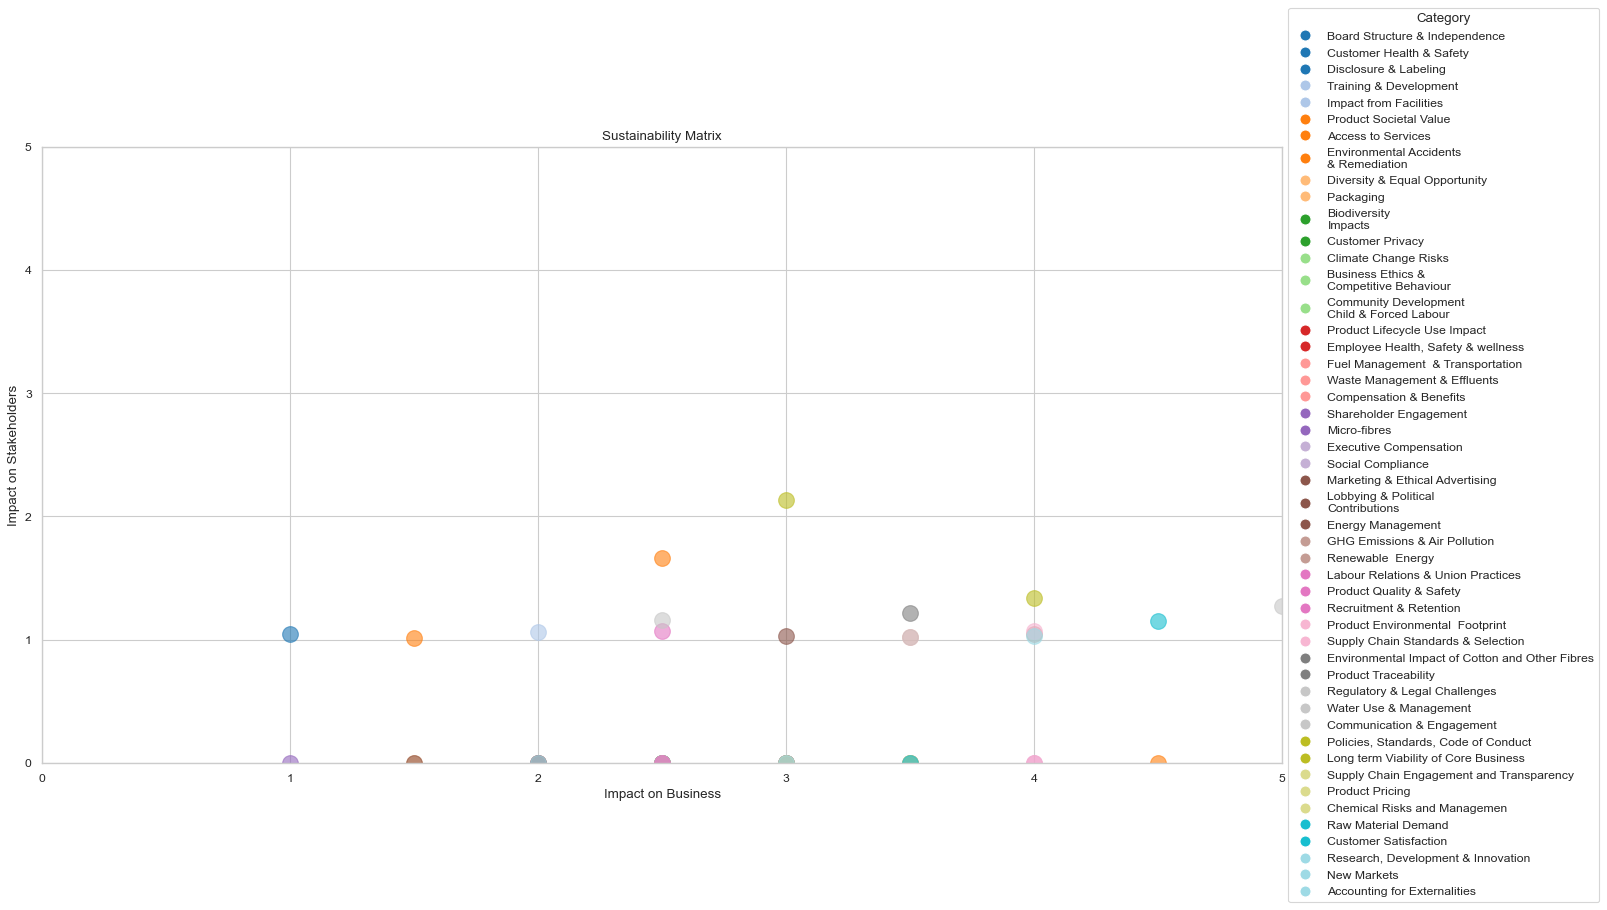

In [277]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Read the CSV files into Pandas Dataframes
df_business = pd.read_csv('Business Dataset\\business_impactscore.csv')
df_stakeholder = pd.read_csv('Stakeholders Dataset\stakeholdersdataset_impactscore.csv')

# 2. Rename the impact score columns
df_business = df_business.rename(columns={'scaled_impact': 'businessimpact'})
df_stakeholder = df_stakeholder.rename(columns={'scaled_impact': 'stakeholdersimpact'})

# 3. Merge the DataFrames on the 'category' column (left join)
merged_df = df_business.merge(df_stakeholder, on='category', how='left')

# 4. Aggregate stakeholder data
stakeholder_agg = merged_df.groupby('category')['stakeholdersimpact'].agg(['mean', 'std']).reset_index()

# 5. Rename columns
stakeholder_agg.columns = ['category', 'stakeholdersimpact_mean', 'stakeholdersimpact_std']

print(stakeholder_agg)
# 6. Merge with business data and fill missing values
merged_df = df_business.merge(stakeholder_agg, on='category', how='left').fillna(0)

# 7. Create category_label column
merged_df['category_label'] = merged_df.apply(lambda row: f"{row['category']} (Business: {row['businessimpact']:.2f}, Stakeholder: {row['stakeholdersimpact_mean']:.2f})", axis=1)

# 8. Normalize the scores for plotting purposes (0-5 range)
merged_df['normalized_business_impact_score'] = merged_df['businessimpact']
merged_df['normalized_stakeholder_impact_score'] = merged_df['stakeholdersimpact_mean']

# 9. Create the scatter plot
plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
cmap = plt.cm.get_cmap('tab20', len(merged_df))

# Scatter Plot
colors = []
for i, row in merged_df.iterrows():
    color = cmap(i)
    colors.append(color)
    plt.scatter(row['normalized_business_impact_score'],
                row['normalized_stakeholder_impact_score'],
                s=200,  
                c=[color], 
                alpha=0.6,  
                marker='o') 

# Legend
labels = merged_df['category'].tolist()
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(labels, colors)]
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), title="Category")

# Additional plot settings (axes, gridlines, etc.)
plt.xlabel('Impact on Business')
plt.ylabel('Impact on Stakeholders')
plt.title('Sustainability Matrix')
plt.grid(True)
plt.xlim(0, 5)


In [ ]:
plt.ylim(0, 5)

plt.show()
